The dataset named Video Game Sales with Ratings contains a collection of more than 16000 data which lists video games with sales above 100,000 copy.

* **Name** : Name of the game
* **Platform** : Console on which the game is running
* **Year_of_Release** : Year of the game released
* **Genre** : Game's category
* **Publisher** : Publisher
* **NA_Sales** : Game sales in North America (in millions of units)
* **EU_Sales** : Game sales in the European Union (in millions of units)
* **JP_Sales** : Game sales in Japan (in millions of units)
* **Other_Sales** : Game sales in the rest of the world
* **Global_Sales** : Total sales in the world (in millions of units)
* **Critic_Score** : Aggregate score compiled by Metacritic staff
* **Critic_Count** : The number of critics used in coming up with the Critic_score
* **User_Score** : Score by Metacritic's subscribers
* **User_Count** : Number of Metacritic's subscribers who gave the user_score
* **Developer** : Party responsible for creating the game
* **Rating** : The ESRB ratings

# Video Game Recommender System

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

games = pd.read_csv("/kaggle/input/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv")
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [2]:
games.info()
games.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#### 1. Drop Data

In [3]:
#Drop unused column

games.drop(['Publisher',
            'NA_Sales',
            'EU_Sales',
            'JP_Sales',
            'Other_Sales',
            'Critic_Count',
            'User_Score',
            'User_Count',
            'Developer',
            'Rating'], axis=1, inplace=True)

In [4]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Global_Sales          0
Critic_Score       8582
dtype: int64

In [5]:
#Option 1- dropna

games.dropna(inplace=True)

#### 2. Grouping Platform

In [6]:
print("type of platform:", games['Platform'].unique())

type of platform: ['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']


In [7]:
# Create new column
games['Platform_General']= games['Platform']

# Group platform in new column
games.loc[games['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
games.loc[games['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PC', 'Platform_General'] = 'PC'
games.loc[games['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
games.loc[games['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
games.loc[games['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
games.loc[games['Platform'] == 'DC', 'Platform_General'] = 'Sega'

In [8]:
games.head()
games["Platform_General"].unique()

array(['Nintendo', 'Microsoft_Xbox', 'Sony_Playstation', 'PC', 'Sega'],
      dtype=object)

#### 3. Change data type

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 0 to 16709
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              7983 non-null   object 
 1   Platform          7983 non-null   object 
 2   Year_of_Release   7983 non-null   float64
 3   Genre             7983 non-null   object 
 4   Global_Sales      7983 non-null   float64
 5   Critic_Score      7983 non-null   float64
 6   Platform_General  7983 non-null   object 
dtypes: float64(3), object(4)
memory usage: 498.9+ KB


In [10]:
# changing the data type of a column
games['Year_of_Release'] = games['Year_of_Release'].astype(int).astype(object)
games['Critic_Score'] = games['Critic_Score'].astype(int)

In [11]:
# rename to a specific value
duplicated_index = games[games.duplicated('Name', keep=False)].index.tolist()
games.loc[duplicated_index, "Platform"] = "Multi_Platform"
games.loc[duplicated_index, "Platform_General"] = "Multi_Platform"
games.loc[games['Genre'] == 'Role-Playing', 'Genre'] = 'Role_Playing'

In [12]:
# merge same game title
games['Global_Sales'] = games.groupby(['Name'])['Global_Sales'].transform('sum')
games = games.drop_duplicates(subset=['Name'])

In [13]:
# changing the column order
games = games.reindex(columns=['Name','Platform','Platform_General','Year_of_Release','Genre','Global_Sales','Critic_Score'])
games = games.reset_index(drop=True)

In [14]:
games.head()

,Name,Platform,Platform_General,Year_of_Release,Genre,Global_Sales,Critic_Score
0,Wii Sports,Wii,Nintendo,2006,Sports,82.53,76
1,Mario Kart Wii,Wii,Nintendo,2008,Racing,35.52,82
2,Wii Sports Resort,Wii,Nintendo,2009,Sports,32.77,80
3,New Super Mario Bros.,DS,Nintendo,2006,Platform,29.80,89
4,Wii Play,Wii,Nintendo,2006,Misc,28.92,58


## Data Visualization

      Total Number  Percentage
1985             1        0.02
1988             1        0.02
1994             1        0.02
1996             7        0.14
1997            17        0.34
1998            27        0.54
1999            39        0.78
2000           131        2.60
2001           274        5.45
2002           428        8.51
2003           363        7.22
2004           360        7.16
2005           410        8.15
2006           397        7.89
2007           421        8.37
2008           456        9.06
2009           393        7.81
2010           295        5.86
2011           285        5.66
2012           179        3.56
2013           144        2.86
2014           140        2.78
2015           135        2.68
2016           127        2.52


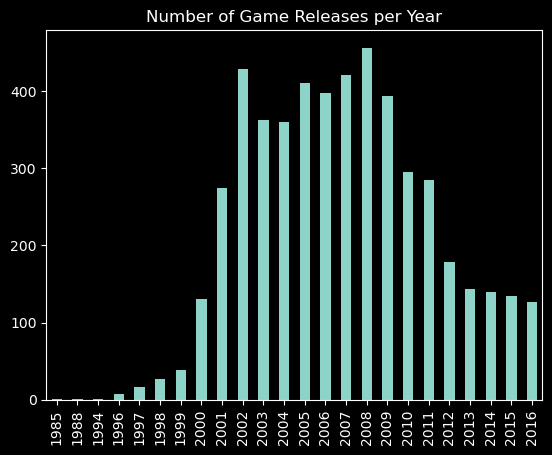

In [15]:
plt.style.use('dark_background')

count = games['Year_of_Release'].value_counts().sort_index()
percent = 100*games['Year_of_Release'].value_counts(normalize=True)
df = pd.DataFrame({'Total Number':count, 'Percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Game Releases per Year");


              Total Number  Percentage
Action                 972       19.32
Sports                 607       12.07
Role_Playing           602       11.97
Shooter                540       10.73
Racing                 426        8.47
Misc                   353        7.02
Platform               310        6.16
Simulation             275        5.47
Fighting               269        5.35
Adventure              246        4.89
Strategy               242        4.81
Puzzle                 189        3.76


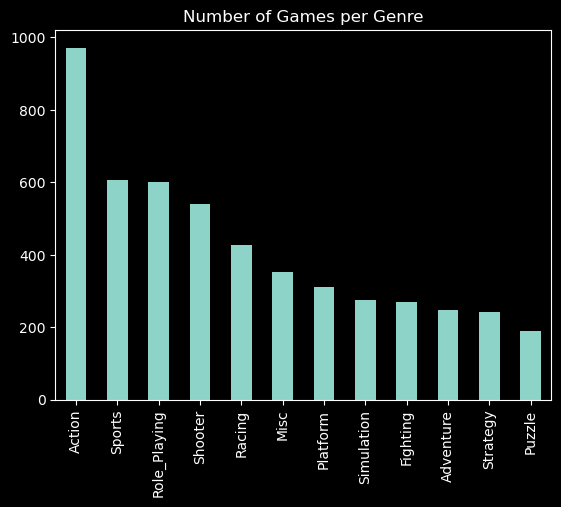

In [16]:
plt.style.use('dark_background')
count = games['Genre'].value_counts()
percent = 100*games['Genre'].value_counts(normalize=True)
df = pd.DataFrame({'Total Number':count, 'Percentage':percent.round(2)})
print(df)
count.plot(kind='bar', title="Number of Games per Genre");

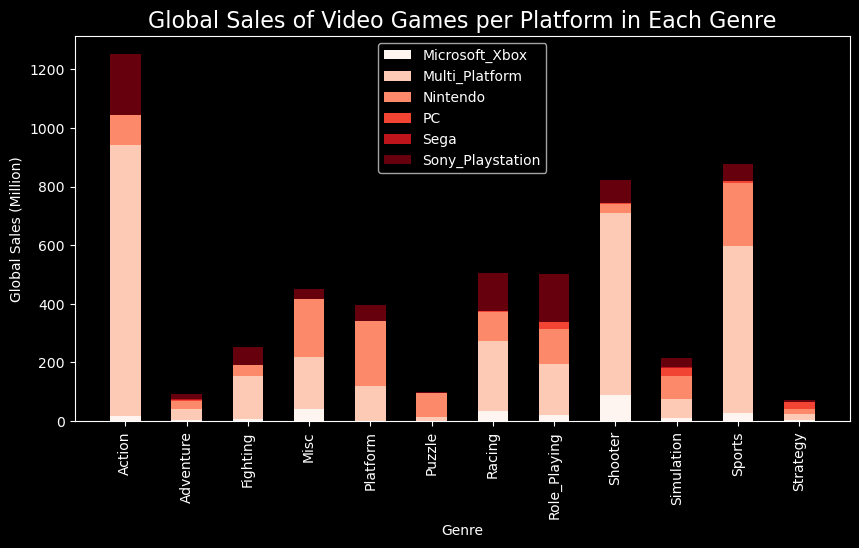

In [17]:
plt.style.use('dark_background')

df = games.groupby(['Genre','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5), colormap= 'Reds')
plt.title('Global Sales of Video Games per Platform in Each Genre', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Genre')
plt.legend(loc=9, prop={'size': 10})
plt.autoscale()
plt.show()

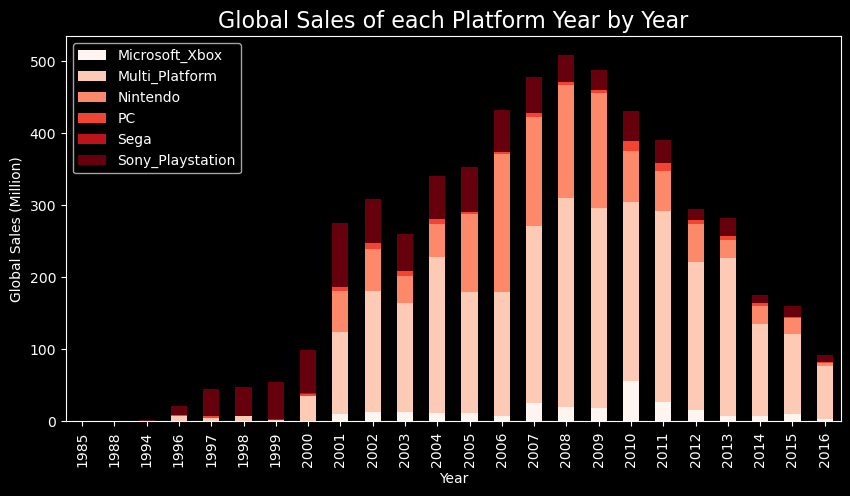

In [18]:
plt.style.use('dark_background')
df = games.groupby(['Year_of_Release','Platform_General']).Global_Sales.sum()
df.unstack().plot.bar(stacked=True, linewidth=0, figsize=(10,5), colormap= 'Reds')
plt.title('Global Sales of each Platform Year by Year', size=16)
plt.ylabel('Global Sales (Million)')
plt.xlabel('Year')
plt.legend(loc=2, prop={'size': 10})
plt.show()

## Create Game Recommendation System 

In [19]:
import numpy as np

dataset = games.copy()

# We choose a random video game.
print(dataset[dataset['Name'].eq('Crash Team Racing')])
query = 'Crash Team Racing'

                  Name Platform  Platform_General Year_of_Release   Genre  \
133  Crash Team Racing       PS  Sony_Playstation            1999  Racing   

     Global_Sales  Critic_Score  
133          4.79            88  


#### 1. Using TfidfVectorizer

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tf = TfidfVectorizer()
tf.fit(dataset['Genre']) 
tf.get_feature_names() 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'fighting',
 'misc',
 'platform',
 'puzzle',
 'racing',
 'role_playing',
 'shooter',
 'simulation',
 'sports',
 'strategy']

In [21]:
tfidf_matrix = tf.fit_transform(dataset['Genre']) 

In [22]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [23]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=dataset['Name']
).sample(12, axis=1).sample(10, axis=0)

,shooter,fighting,simulation,role_playing,racing,puzzle,misc,sports,platform,strategy,adventure,action
Name,,,,,,,,,,,,
Star Wars: Flight of the Falcon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Puzzle Quest 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Advance Wars: Dual Strike,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Sydney 2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
JSRF: Jet Set Radio Future,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Professor Heinz Wolff's Gravity,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Blast Works: Build, Trade, Destroy",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rugby 2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Skylanders: SuperChargers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [25]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=dataset['Name'], columns=dataset['Name'])
print('Shape:', cosine_sim_df.shape)

#Check the similarity matrix at each genre
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (5031, 5031)


Name,Spectral Force Genesis,Mass Effect,Technic Beat,Zumba Fitness,Harvest Moon: The Tale of Two Towns
Name,,,,,
Lara Croft Tomb Raider: The Angel of Darkness,0.0,0.0,0.0,0.0,0.0
Red Dead Revolver,0.0,0.0,0.0,0.0,0.0
Batman: Arkham VR,0.0,0.0,0.0,0.0,0.0
Carnival Games: Mini Golf,0.0,0.0,0.0,1.0,0.0
Kingdom Hearts II,1.0,1.0,0.0,0.0,0.0
Mage Knight: Destiny's Soldier,0.0,0.0,0.0,0.0,0.0
Popeye: Rush for Spinach,0.0,0.0,0.0,0.0,0.0
Jillian Michaels' Fitness Ultimatum 2009,0.0,0.0,0.0,1.0,0.0
Tony Hawk's Pro Skater,0.0,0.0,0.0,1.0,0.0


#### Implement recommendation

In [26]:
def recommender_system(Name, k=500):
    similarity_data = cosine_sim_df
    items = dataset[['Name','Platform','Year_of_Release','Genre','Global_Sales','Critic_Score']]
    genre = dataset.loc[dataset["Name"] == Name].Genre.values

    index = similarity_data.loc[:,Name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(Name, errors='ignore')
    
    goat = dataset.sort_values(by=['Critic_Score'],ascending=False).head(3)
    best_selling_genre = dataset.loc[dataset["Genre"] == genre[0]].sort_values(by=['Global_Sales'],ascending=False).head(5)
    recommendation = pd.DataFrame(closest).merge(items[['Name','Platform','Year_of_Release','Genre']]).head(k)
    
    return Name, goat, best_selling_genre, recommendation, genre

In [27]:
Name, goat, best_selling_genre, recommendation, genre = recommender_system(query)

In [28]:
print("Top 3 Greatest Games of All Time:")
print("-----"*10)
for row1 in goat.itertuples():
    print('[Score: %d/100] %s (%s)'%(row1.Critic_Score,row1.Name,row1.Year_of_Release))

print("====="*10)  
print("Top 5 Best Selling %s Games of All Time:"%genre[0])
print("-----"*10)
for row2 in best_selling_genre.itertuples():
    print('%s (%s) - %s'%(row2.Name,row2.Year_of_Release,row2.Platform))

print("====="*10)
print("Since you play %s,"%Name)
print("here are the Top 10 Games you probably like:")
print("-----"*10)
for row3 in recommendation.head(10).itertuples():
    print('%s (%s) - %s'%(row3.Name,row3.Year_of_Release,row3.Platform))

Top 3 Greatest Games of All Time:
--------------------------------------------------
[Score: 98/100] Grand Theft Auto IV (2008)
[Score: 98/100] Tony Hawk's Pro Skater 2 (2000)
[Score: 98/100] SoulCalibur (1999)
Top 5 Best Selling Racing Games of All Time:
--------------------------------------------------
Mario Kart Wii (2008) - Wii
Mario Kart DS (2005) - DS
Gran Turismo 3: A-Spec (2001) - PS2
Mario Kart 7 (2011) - 3DS
Gran Turismo 4 (2004) - PS2
Since you play Crash Team Racing,
here are the Top 10 Games you probably like:
--------------------------------------------------
L.A. Rush (2005) - Multi_Platform
GT Advance 2: Rally Racing (2001) - GBA
F1 2002 (2002) - Multi_Platform
Burnout (2001) - Multi_Platform
Blood Drive (2010) - Multi_Platform
Cruis'n (2007) - Wii
nail'd (2010) - Multi_Platform
Pokemon Dash (2004) - DS
Blur (2010) - Multi_Platform
Pimp My Ride (2008) - Multi_Platform


#### Checking Accuracy 

In [29]:
recommendation["Genre"].value_counts()

Racing          425
Action           16
Sports           16
Role_Playing     12
Shooter           8
Misc              8
Fighting          6
Platform          3
Simulation        2
Adventure         2
Puzzle            1
Strategy          1
Name: Genre, dtype: int64

In [30]:
relevant = not_related = 0

for checking in recommendation.itertuples():
    if checking.Genre == genre[0]:
        relevant+=1
    else:
        not_related+=1
        
print("Out of a total of 500 recommendation lists,")
print("- Number of relevant recommendations:",relevant)
print("- Number of irrelevant recommendations:",not_related)
print("Precision Score =",(relevant/500))

Out of a total of 500 recommendation lists,
- Number of relevant recommendations: 425
- Number of irrelevant recommendations: 75
Precision Score = 0.85


## For Improvement

The system can be further improved to generate more robust and personalized recommendations for users.

This can be developed by: 
- using data on search style of similar users (collaborative filtering) in conjunction with history which share similar characteristics who’ve been rated by users (content based).
- utilize other machine learning model such as KNN to improve accuracy.